In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


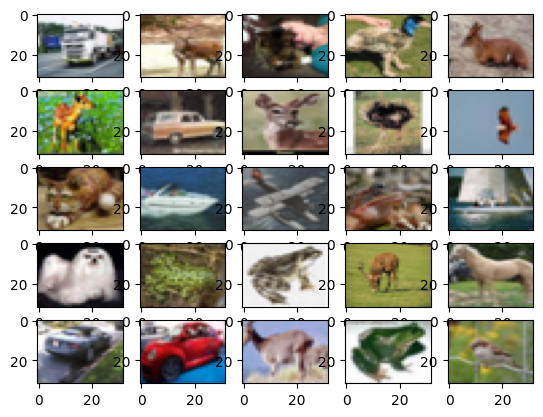

In [9]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 1000

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


In [10]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [11]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [12]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=55)


Epoch 1/55
1563/1563 [==============================] - 577s 367ms/step - loss: 1.3097 - accuracy: 0.5504 - val_loss: 1.0729 - val_accuracy: 0.6237
Epoch 2/55
1563/1563 [==============================] - 597s 382ms/step - loss: 0.8510 - accuracy: 0.7042 - val_loss: 0.7954 - val_accuracy: 0.7291
Epoch 3/55
1563/1563 [==============================] - 588s 376ms/step - loss: 0.7021 - accuracy: 0.7593 - val_loss: 0.6958 - val_accuracy: 0.7606
Epoch 4/55
1563/1563 [==============================] - 590s 377ms/step - loss: 0.5837 - accuracy: 0.8011 - val_loss: 0.6709 - val_accuracy: 0.7755
Epoch 5/55
1563/1563 [==============================] - 574s 367ms/step - loss: 0.4951 - accuracy: 0.8292 - val_loss: 0.7303 - val_accuracy: 0.7632
Epoch 6/55
1563/1563 [==============================] - 590s 377ms/step - loss: 0.4215 - accuracy: 0.8536 - val_loss: 0.6271 - val_accuracy: 0.7960
Epoch 7/55
1563/1563 [==============================] - 587s 376ms/step - loss: 0.3555 - accuracy: 0.8760 - val_

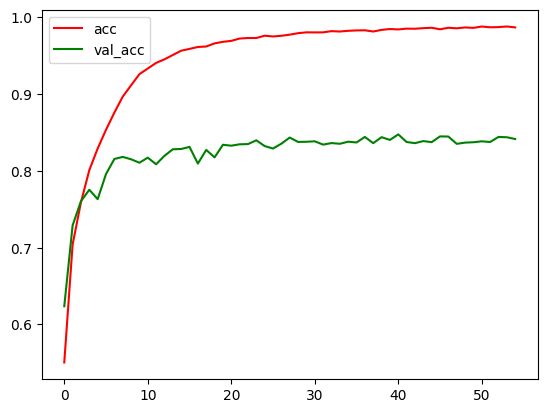

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 30ms/step
Original label is deerdog and predicted label is deerdog


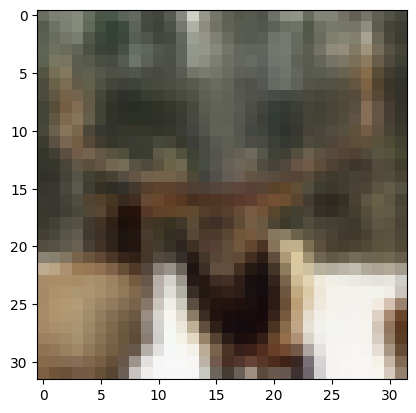

In [22]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 26

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


In [17]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=10)


Epoch 1/10
1562/1562 [==============================] - 629s 401ms/step - loss: 0.5434 - accuracy: 0.8282 - val_loss: 0.5409 - val_accuracy: 0.8320
Epoch 2/10
1562/1562 [==============================] - 611s 391ms/step - loss: 0.4351 - accuracy: 0.8570 - val_loss: 0.4807 - val_accuracy: 0.8443
Epoch 3/10
1562/1562 [==============================] - 613s 393ms/step - loss: 0.4056 - accuracy: 0.8658 - val_loss: 0.5304 - val_accuracy: 0.8353
Epoch 4/10
1562/1562 [==============================] - 617s 395ms/step - loss: 0.3835 - accuracy: 0.8724 - val_loss: 0.4830 - val_accuracy: 0.8460
Epoch 5/10
1562/1562 [==============================] - 615s 394ms/step - loss: 0.3661 - accuracy: 0.8791 - val_loss: 0.4504 - val_accuracy: 0.8558
Epoch 6/10
1562/1562 [==============================] - 615s 394ms/step - loss: 0.3555 - accuracy: 0.8830 - val_loss: 0.4299 - val_accuracy: 0.8626
Epoch 7/10
1562/1562 [==============================] - 614s 393ms/step - loss: 0.3415 - accuracy: 0.8855 - val_

In [18]:
# save the model
model.save('my-model-cifar-10_v2.h5')


1/1 [==============================] - 0s 45ms/step
Original label is deerdog and predicted label is deerdog


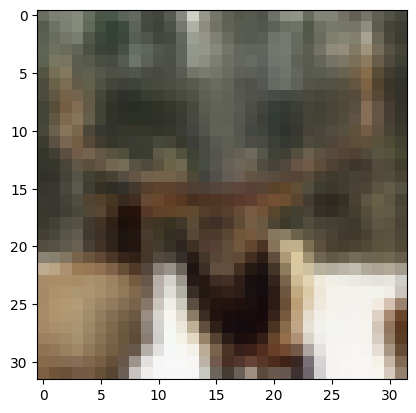

In [23]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 26

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 25s 79ms/step - loss: 0.4273 - accuracy: 0.8638
Test Accuracy: 0.8637999892234802


In [25]:
# Evaluate the model on the test set without data augmentation
test_generator = data_generator.flow(x_test, y_test, batch_size)
test_steps_per_epoch = x_test.shape[0] // batch_size

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

# Print the test accuracy without data augmentation
print("Test Accuracy (Without Data Augmentation):", test_accuracy)


312/312 [==============================] - 31s 98ms/step - loss: 0.4635 - accuracy: 0.8508
Test Accuracy (Without Data Augmentation): 0.8507612347602844


**Project Title: CIFAR-10 Image Classification with Convolutional Neural Network**

**Description:**
In this project, a Convolutional Neural Network (CNN) was implemented to classify images from the CIFAR-10 dataset into ten different classes: airplane, automobile, bird, cat, deerdog, frog, horse, ship, and truck. The CNN architecture was designed using the functional API in TensorFlow/Keras.

**Architecture:**
The CNN architecture consists of several layers:
1. Input layer: Accepts 32x32 color images.
2. Convolutional layers: Two sets of Conv2D layers with 32, 64, and 128 filters respectively, followed by batch normalization and ReLU activation.
3. Max Pooling layers: MaxPooling2D layers are used after each set of convolutional layers to reduce spatial dimensions.
4. Flatten layer: Flattens the output from the convolutional layers for input into the fully connected layers.
5. Fully connected layers: Two dense layers with 1024 neurons and ReLU activation are used as hidden layers.
6. Output layer: A dense layer with softmax activation to predict the probability of each class.

**Training and Tuning:**
The model was trained using the Adam optimizer with sparse categorical cross-entropy loss. The initial training was performed for 55 epochs on the original training dataset. Data augmentation techniques, such as width shift, height shift, and horizontal flip, were applied to generate augmented training data.

**Results:**
The model achieved an impressive test accuracy of approximately 86.38%. The use of data augmentation enhanced the model's robustness and generalization capability.

**Graphs:**
Below are the graphs of loss and accuracy on training and validation data over the epochs:

![Graph Loss and Accuracy](/content/graph_loss_accuracy.png)

**Conclusion:**
The CNN architecture, along with data augmentation, proved to be effective in accurately classifying CIFAR-10 images. The model achieved good accuracy and demonstrated resilience to variations in the input data. The project provides a comprehensive understanding of the image classification process using CNNs and data augmentation techniques.